# Finemapping by calling susieR

## Load gwaslab and sample data 

In [1]:
import sys
sys.path.insert(0,"/home/yunye/work/gwaslab/src")
import gwaslab as gl

In [2]:
gl.show_version()

2025/03/12 16:49:43 GWASLab v3.5.7 https://cloufield.github.io/gwaslab/
2025/03/12 16:49:43 (C) 2022-2025, Yunye He, Kamatani Lab, GPL-3.0 license, gwaslab@gmail.com


In [3]:
mysumstats = gl.Sumstats("../../0_sample_data/t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             ea="ALT",nea="REF",
             pos="POS",
             beta="BETA",
             se="SE",
             n=150000,
              chrom_pat="^7",
             p="P")

2025/03/12 16:49:43 GWASLab v3.5.7 https://cloufield.github.io/gwaslab/
2025/03/12 16:49:43 (C) 2022-2025, Yunye He, Kamatani Lab, GPL-3.0 license, gwaslab@gmail.com
2025/03/12 16:49:43 Start to initialize gl.Sumstats from file :../../0_sample_data/t2d_bbj.txt.gz
2025/03/12 16:49:43  -Columns used to filter variants: CHR
2025/03/12 16:49:43  -Loading only variants on chromosome with pattern : ^7 ...
2025/03/12 16:49:56  -Loaded 707780 variants on chromosome with pattern :^7 ...
2025/03/12 16:49:56  -Reading columns          : POS,P,SNP,BETA,REF,ALT,CHR,SE
2025/03/12 16:49:56  -Renaming columns to      : POS,P,SNPID,BETA,NEA,EA,CHR,SE
2025/03/12 16:49:56  -Current Dataframe shape : 707780  x  8
2025/03/12 16:49:56  -Initiating a status column: STATUS ...
2025/03/12 16:49:56  #WARNING! Version of genomic coordinates is unknown...
2025/03/12 16:49:57 Start to reorder the columns...v3.5.7
2025/03/12 16:49:57  -Current Dataframe shape : 707780 x 10 ; Memory usage: 70.27 MB
2025/03/12 16:49:

In [4]:
mysumstats.data = mysumstats.data.iloc[:100000,:]

In [5]:
mysumstats.fix_id(fixsep=True,verbose=False)
mysumstats.basic_check(verbose=False)

## run finemapping

### calculate ld matrix for each locus

In [6]:
mysumstats.calculate_ld_matrix( plink="/home/yunye/tools/bin/plink", 
                                plink2="/home/yunye/tools/bin/plink2",
                                vcf = gl.get_path("1kg_eas_hg19"))

2025/03/12 15:03:45 Start to calculate LD matrix...v3.5.7
2025/03/12 15:03:45  -Current Dataframe shape : 100000 x 10 ; Memory usage: 27.94 MB
2025/03/12 15:03:45  -Loci were not provided. All significant loci will be automatically extracted...
2025/03/12 15:03:45 Start to extract lead variants...v3.5.7
2025/03/12 15:03:45  -Current Dataframe shape : 100000 x 10 ; Memory usage: 27.94 MB
2025/03/12 15:03:45  -Processing 100000 variants...
2025/03/12 15:03:45  -Significance threshold : 5e-08
2025/03/12 15:03:45  -Sliding window size: 1000  kb
2025/03/12 15:03:45  -Using P for extracting lead variants...
2025/03/12 15:03:45  -Found 133 significant variants in total...
2025/03/12 15:03:45  -Identified 2 lead variants!
2025/03/12 15:03:45 Finished extracting lead variants.
2025/03/12 15:03:45  -plink1.9 path: /home/yunye/tools/bin/plink
2025/03/12 15:03:45  -plink2 path: /home/yunye/tools/bin/plink2
2025/03/12 15:03:45  -Dropping duplicated SNPIDs...
2025/03/12 15:03:45  -Locus #1----------

In [7]:
mysumstats.finemapping["file"]

,SNPID,SNPID_LIST,LD_R_MATRIX,LOCUS_SUMSTATS,STUDY
0,7:13888699:G:C,./Study_1_7:13888699:G:C_1000.snplist.raw,./Study_1_7:13888699:G:C_1000.ld.gz,./Study_1_7:13888699:G:C_1000.sumstats.gz,Study_1
1,7:14898282:C:T,./Study_1_7:14898282:C:T_1000.snplist.raw,./Study_1_7:14898282:C:T_1000.ld.gz,./Study_1_7:14898282:C:T_1000.sumstats.gz,Study_1


In [8]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,BETA,SE,P,N,STATUS
0,7:40386:A:G,7,40386,G,A,0.0070,0.0167,0.67480,150000,9960099
1,7:40845:C:T,7,40845,C,T,-0.0076,0.0167,0.64900,150000,9960099
2,7:42289:G:A,7,42289,G,A,0.0082,0.0290,0.77650,150000,9960099
3,7:43050:A:C,7,43050,C,A,-0.0092,0.0282,0.74510,150000,9960099
4,7:44444:T:C,7,44444,C,T,-0.0086,0.0276,0.75480,150000,9960099
...,...,...,...,...,...,...,...,...,...,...
99995,7:17930343:T:A,7,17930343,T,A,-0.1231,0.1737,0.47850,150000,9960099
99996,7:17930802:G:A,7,17930802,G,A,-0.0074,0.0282,0.79360,150000,9960099
99997,7:17930905:T:C,7,17930905,C,T,0.1717,0.1320,0.19350,150000,9960099
99998,7:17932138:T:A,7,17932138,T,A,-0.0216,0.0524,0.67990,150000,9960099


### run susie rss by calling SuSieR in R

In [9]:
mysumstats.run_susie_rss(r="/home/yunye/anaconda3/envs/r44/bin/Rscript")

2025/03/12 15:05:45 Start to run finemapping using SuSieR from command line...v3.5.7
2025/03/12 15:05:45  -R version: Rscript (R) version 4.4.2 (2024-10-31)
2025/03/12 15:05:45  -SuSieR version: [1] ‘0.12.35’
2025/03/12 15:05:45  -Running for: 7:13888699:G:C - Study_1
2025/03/12 15:05:45   -Locus sumstats:./Study_1_7:13888699:G:C_1000.sumstats.gz
2025/03/12 15:05:45   -LD r matrix:./Study_1_7:13888699:G:C_1000.ld.gz
2025/03/12 15:05:45   -output_prefix:./Study_1_7:13888699:G:C_1000
2025/03/12 15:05:45   -SuSieR script: susie_rss(bhat = sumstats$BETA,shat = sumstats$SE,, n = n, R = R, max_iter = 100000, min_abs_corr=0.1, refine = TRUE, L = 10)
2025/03/12 15:05:45   -Createing temp R script: _Study_1_7:13888699:G:C_139976691125296_gwaslab_susie_temp.R
2025/03/12 15:05:45   -Running SuSieR from command line...
2025/03/12 15:08:47   -Removing temp R script: _Study_1_7:13888699:G:C_139976691125296_gwaslab_susie_temp.R
2025/03/12 15:08:47   -SuSieR result summary to: ./Study_1_7:13888699:G:C

In [10]:
mysumstats.pipcs.to_csv("mysumstats.pipcs",index=None)

In [6]:
mysumstats.read_pipcs("mysumstats")

2025/03/12 16:50:07 Start to load PIP and CREDIBLE_SET_INDEX from file...
2025/03/12 16:50:07  -File:mysumstats.pipcs
2025/03/12 16:50:07  -Current pipcs Dataframe shape : 22498  x  8
2025/03/12 16:50:07  -Column  : N_SNP PIP     CREDIBLE_SET_INDEX SNPID  LOCUS  STUDY  CHR   POS  
2025/03/12 16:50:07  -DType   : int64 float64 int64              object object object int64 int64
2025/03/12 16:50:07  -Verified: T     T       T                  T      T      T      T     T    
2025/03/12 16:50:07  -Current Dataframe memory usage: 1.37 MB
2025/03/12 16:50:07 Finished loading PIP and CREDIBLE_SET_INDEX from file!


In [7]:
mysumstats.pipcs

,N_SNP,PIP,CREDIBLE_SET_INDEX,SNPID,LOCUS,STUDY,CHR,POS
0,11593,0.449307,-1,7:14882428:G:A,7:13888699:G:C,Study_1,7,14882428
1,6097,0.324785,1,7:13888699:G:C,7:13888699:G:C,Study_1,7,13888699
2,6082,0.241757,1,7:13886654:C:T,7:13888699:G:C,Study_1,7,13886654
3,6086,0.108743,1,7:13887008:C:A,7:13888699:G:C,Study_1,7,13887008
4,6109,0.106681,1,7:13889927:C:CCT,7:13888699:G:C,Study_1,7,13889927
...,...,...,...,...,...,...,...,...
22493,3547,0.000263,-1,7:14505722:A:G,7:14898282:C:T,Study_1,7,14505722
22494,9624,0.000263,-1,7:15635359:G:T,7:14898282:C:T,Study_1,7,15635359
22495,7883,0.000263,-1,7:15315091:T:G,7:14898282:C:T,Study_1,7,15315091
22496,6667,0.000263,-1,7:15094176:T:C,7:14898282:C:T,Study_1,7,15094176


## plot pipcs

2025/03/12 16:50:07  -Loading PIP and CS for variants in the locus :None
2025/03/12 16:50:07  -Extracted region:(7, 13898616, 15898188)


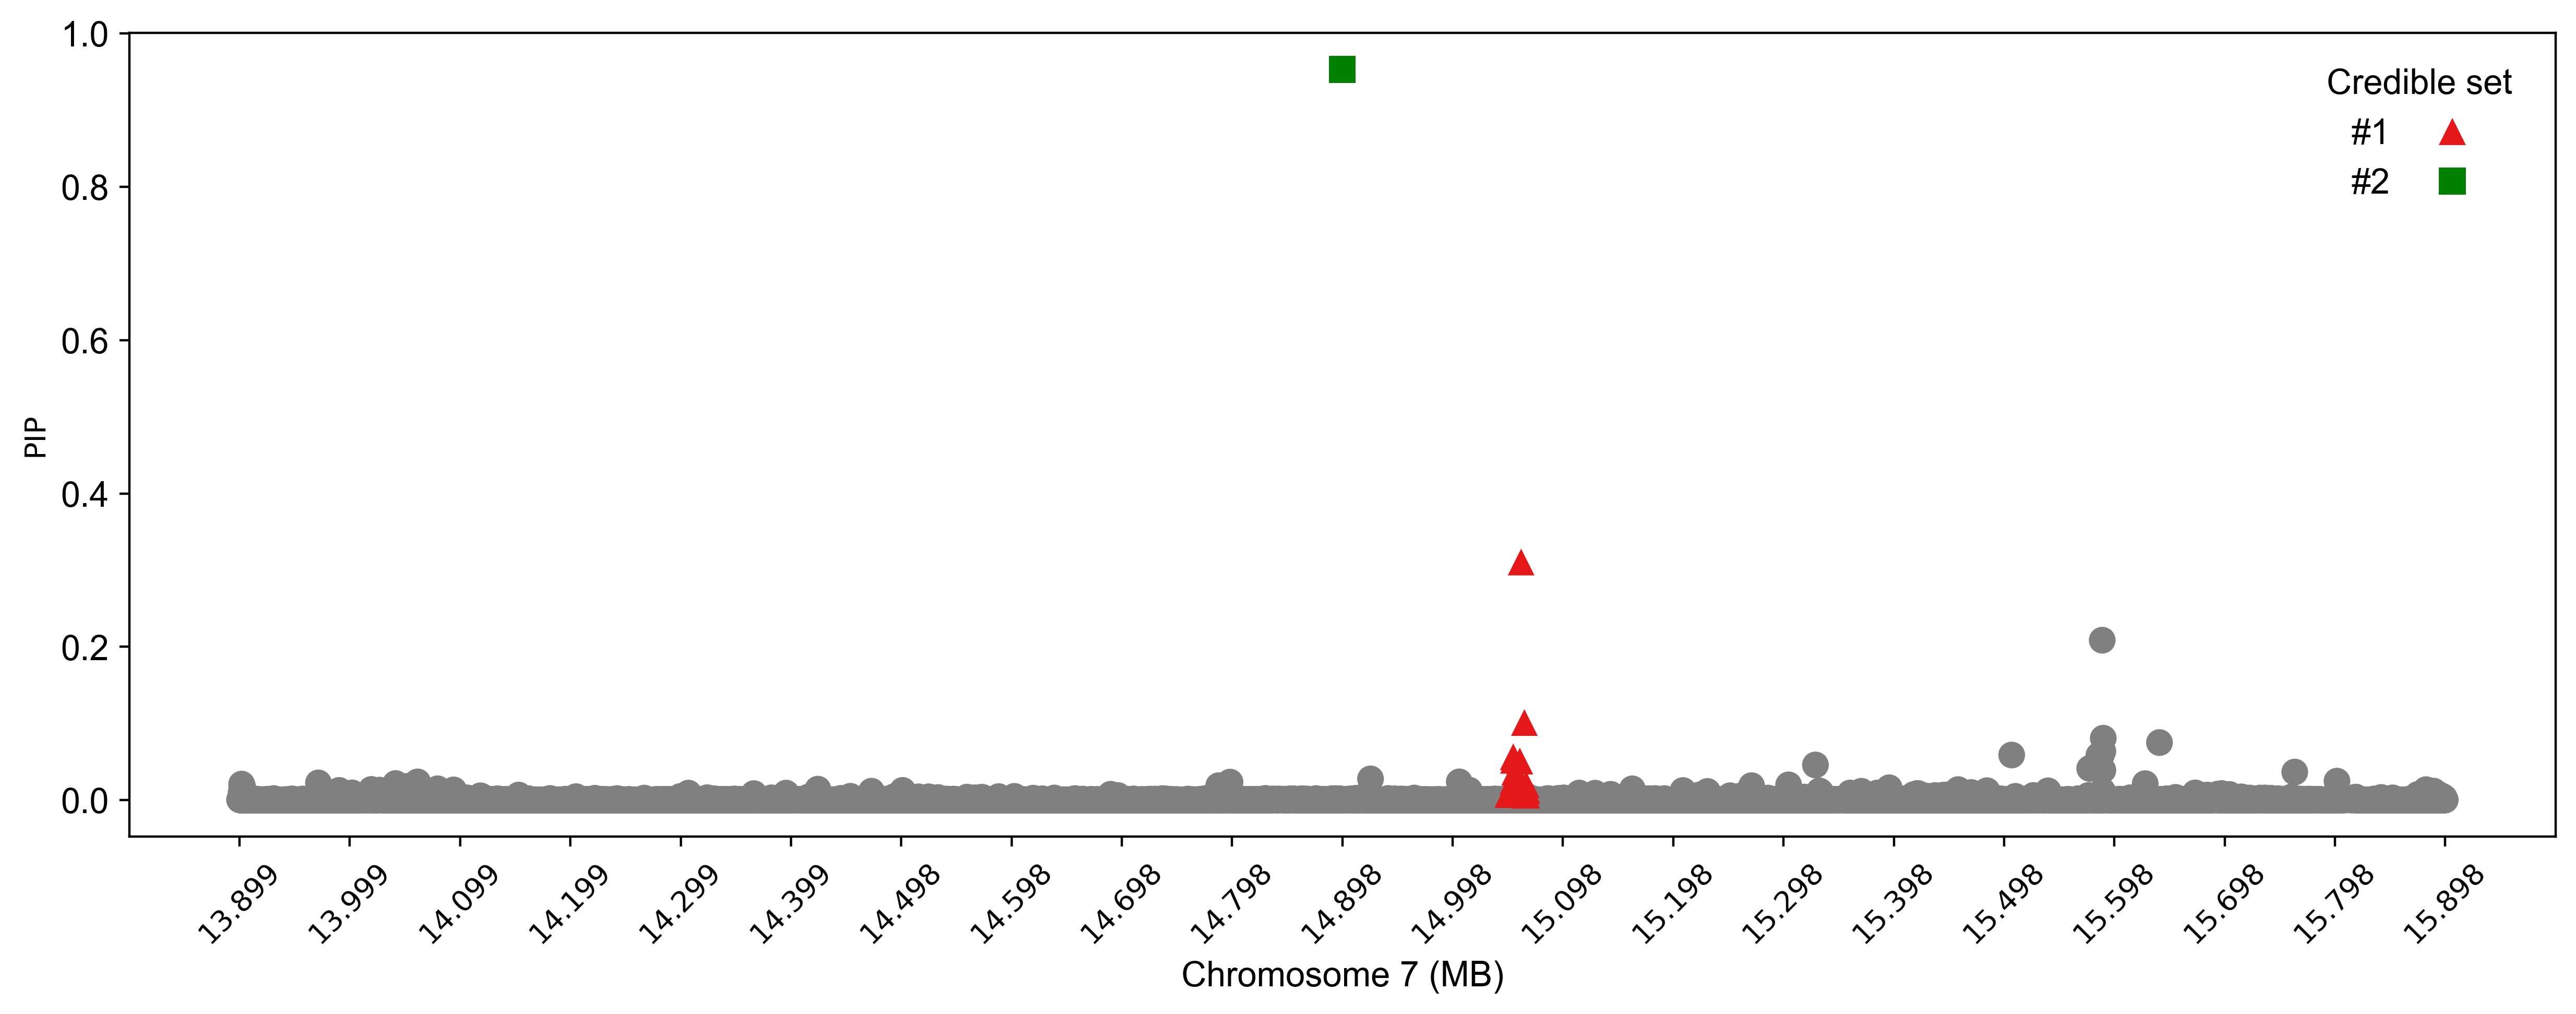

In [8]:
mysumstats.plot_pipcs(locus="7:14898282:C:T")

## stacked plots

In [9]:
mysumstats.get_cs_lead()

,N_SNP,PIP,CREDIBLE_SET_INDEX,SNPID,LOCUS,STUDY,CHR,POS
11618,5520,0.953007,2,7:14898282:C:T,7:14898282:C:T,Study_1,7,14898282
1,6097,0.324785,1,7:13888699:G:C,7:13888699:G:C,Study_1,7,13888699
11619,6422,0.310574,1,7:15060429:T:A,7:14898282:C:T,Study_1,7,15060429


INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


2025/03/12 16:50:36  -Extract SNPs in region : chr7:13898282-15898282...
2025/03/12 16:50:36  -Extract SNPs in specified regions: 16346
2025/03/12 16:50:36  -Loading PIP and CS for variants in the region :(7, 13898282, 15898282)


(<Figure size 3200x2400 with 5 Axes>, <gwaslab.g_Log.Log at 0x7f9d300660c0>)

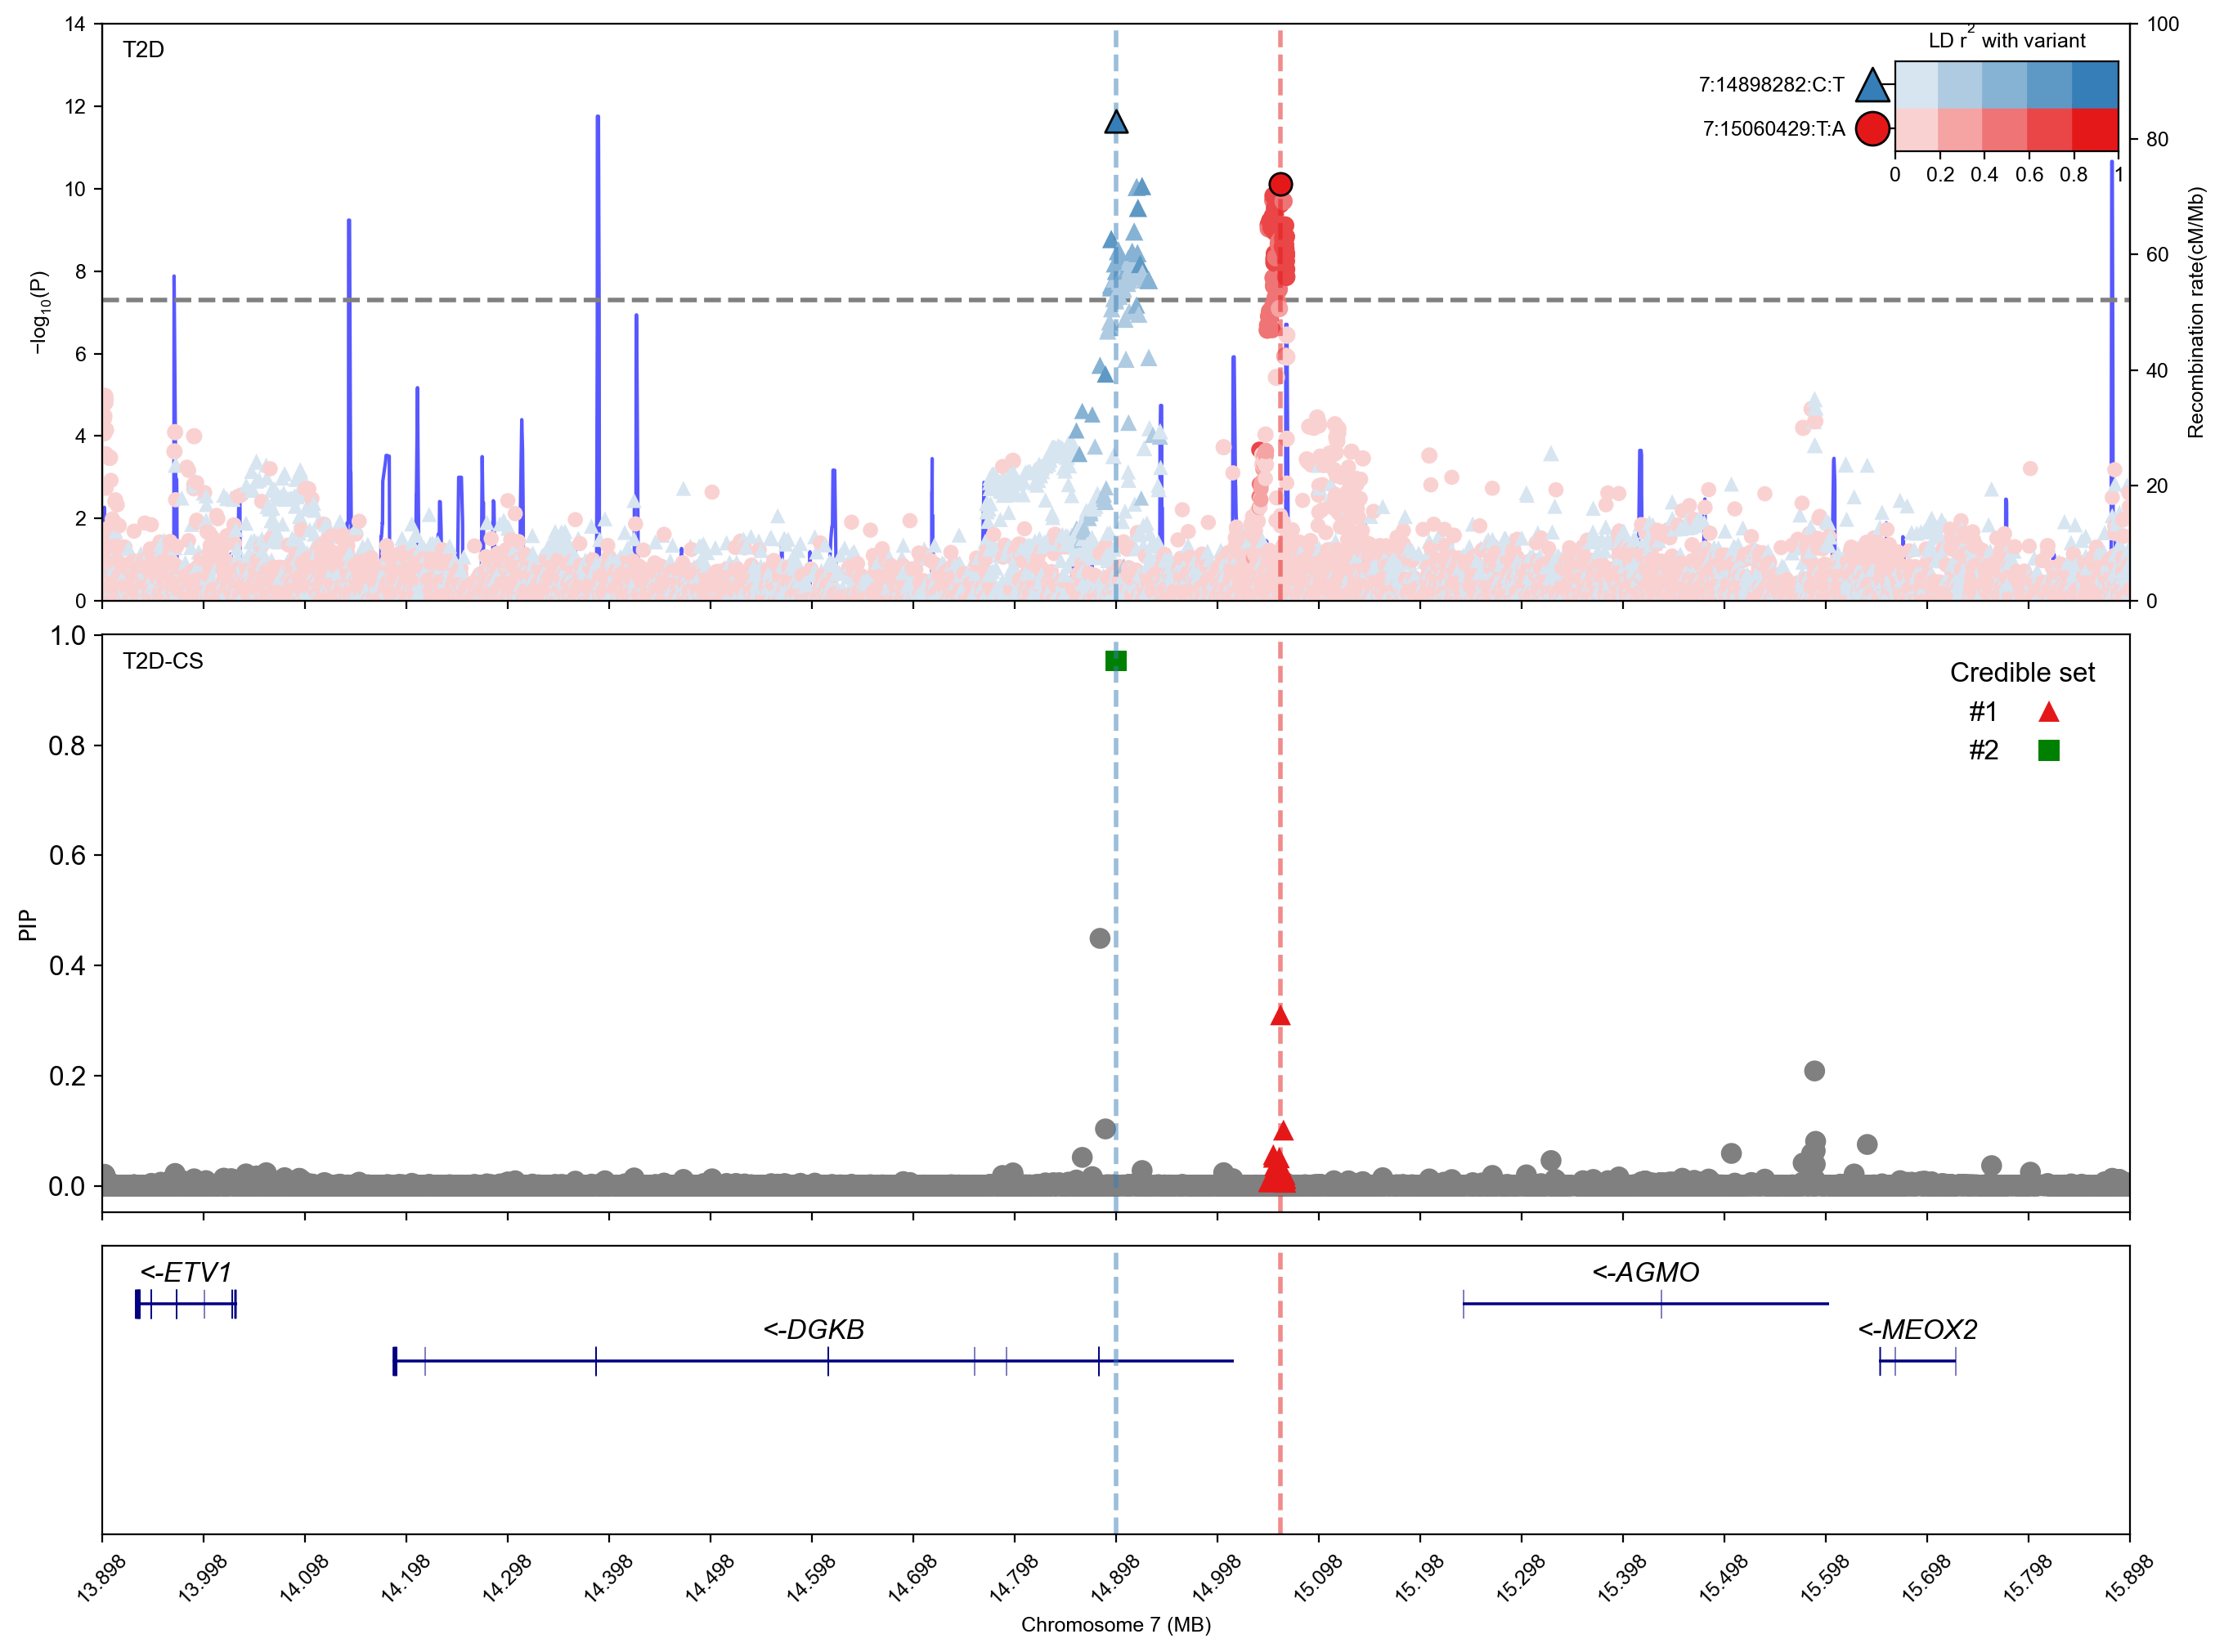

In [10]:
gl.plot_stacked_mqq(objects=[mysumstats, mysumstats.pipcs],
                    build="19",
                    vcfs=[gl.get_path("1kg_eas_hg19")],
                    mode="r",
                    region_ref=["7:15060429:T:A",
                                "7:14898282:C:T"],
                    region=(7,14898282-1000000,14898282+1000000),
                    skip=0,marker_szie2=(100,100),
                    titles=["T2D","T2D-CS"],
                    check=False,
                    verbose=False)